# Plant Seedling Classification

In [1]:
#list of useful imports that  I will use
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image 
import tensorflow as tf
from PIL import Image


from keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import legacy
from keras.optimizers import Adam

In [2]:
#save the path into variable to use it easily next times.
DATA_FOLDER= r"C:\Users\shoba\Music\code\plant-seedlings-classification\train"

**Read images and remove missing values save images in images listt**

In [3]:
data = os.listdir(DATA_FOLDER)

In [4]:
data

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [5]:
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(DATA_FOLDER):
    class_folder_path = os.path.join(DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_path)
        
        classes.append(class_label)

In [6]:
len(images)

4750

**Resizing images**

In [7]:

def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [8]:
#save resized images into images.
images = [resize_images(img) for img in images]

In [9]:
images[0].shape

(224, 224, 3)

In [10]:
images_array = np.array(images)

In [11]:
images_array.shape

(4750, 224, 224, 3)

## Number of images in each class

In [12]:
#see number of images in each lablel
images = images_array
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

images shape:  (4750, 224, 224, 3)
classes shape:  (4750,)
number of Common Chickweed images is  -> 611
number of Shepherds Purse images is  -> 231
number of Maize images is  -> 221
number of Small-flowered Cranesbill images is  -> 496
number of Charlock images is  -> 390
number of Common wheat images is  -> 221
number of Cleavers images is  -> 287
number of Loose Silky-bent images is  -> 654
number of Scentless Mayweed images is  -> 516
number of Black-grass images is  -> 263
number of Fat Hen images is  -> 475
number of Sugar beet images is  -> 385


## Distrbution of the images

Text(0.5, 0.98, 'Categorical Plotting')

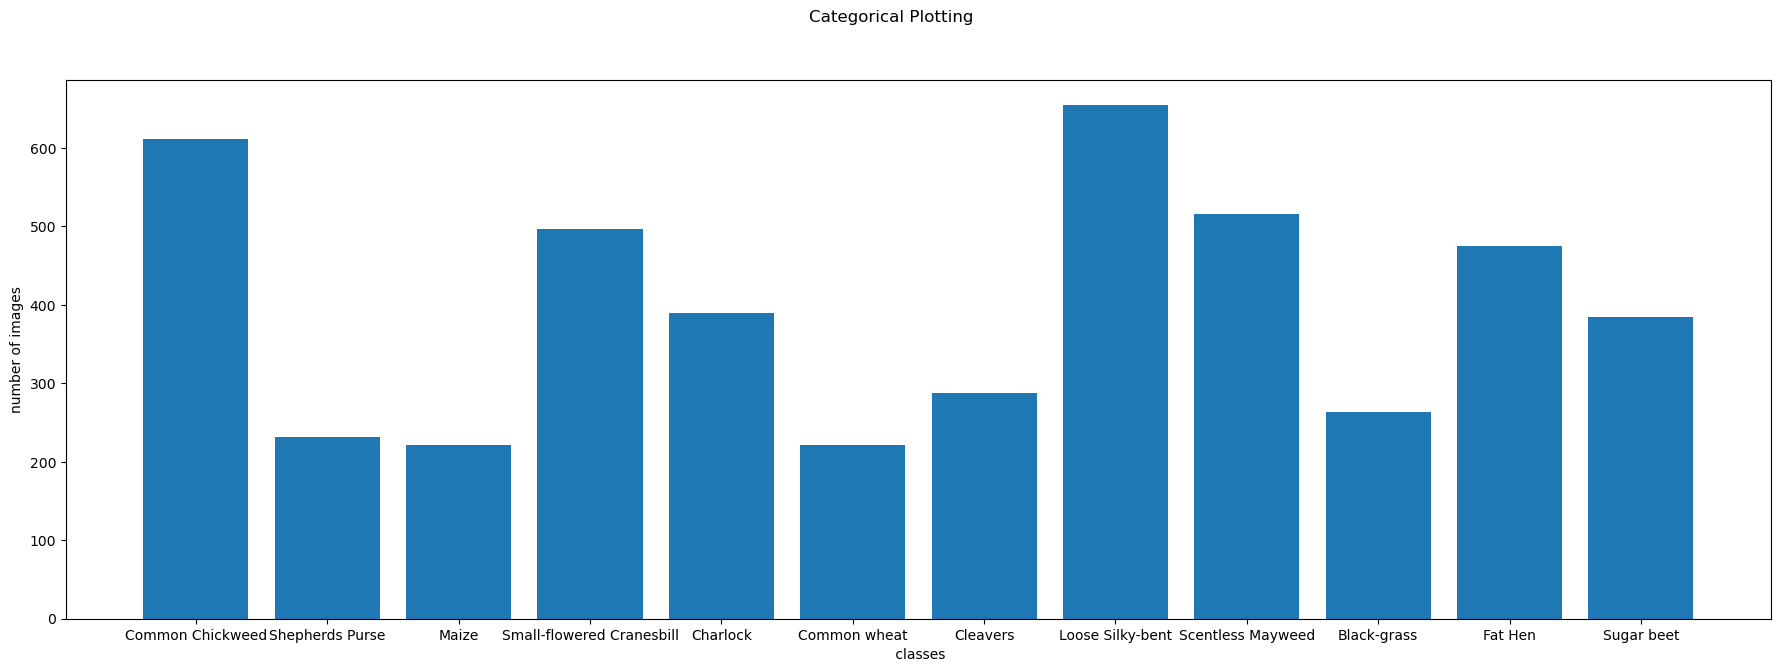

In [13]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

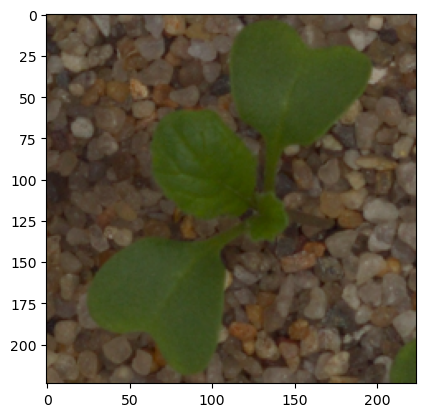

In [14]:
plt.imshow(images[500])

In [15]:
images = np.array(images)

In [16]:
images.shape

(4750, 224, 224, 3)

## Label encoder

In [17]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [18]:
y[0]


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
y=np.array(y)

## Spliting data into training and testing 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=42)

In [21]:
X_train.shape

(3325, 224, 224, 3)

In [22]:
X_train.shape[1]

224

In [23]:
X_test.shape

(1425, 224, 224, 3)

## CNN MODEL

In [24]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,224, 224, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [25]:
opt = Adam(learning_rate=0.001)

optimizer =legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size = 128)

Epoch 1/10
26/26 [==============================] - 916s 35s/step - loss: 4.8239 - accuracy: 0.1104 - val_loss: 2.4551 - val_accuracy: 0.1382
Epoch 2/10
 2/26 [=>............................] - ETA: 12:45 - loss: 2.4785 - accuracy: 0.1094

In [ ]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

In [ ]:
# Creating results data frame 
results = pd.DataFrame(columns=['model', 'Test-Accuracy' ])
new = ['CNN ',0.79]
results.loc[0] = new

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model.predict(X_test)),np.argmax(y_true,axis=1)))
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
class_names = ['Sugar beet',
 'Common wheat',
 'Small-flowered Cranesbill',
 'Maize',
 'Charlock',
 'Shepherds Purse',
 'Black-grass',
 'Cleavers',
 'Common Chickweed',
 'Fat Hen',
 'Scentless Mayweed',
 'Loose Silky-bent']

In [ ]:
# print images with actual and predicted class labels
for i in range(20):
  plt.figure(figsize=(30,30))
  plt.subplot(4,5,i+1)
  pred = np.argmax(model_cnn.predict(np.array([X_test[i]]))[0])
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(class_names[pred],class_names[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(X_test[i])

## VGG_16 Model


In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [ ]:
vgg.trainable=False

In [ ]:
model_1=Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(12, activation='softmax'))

In [ ]:
opt = Adam(learning_rate=0.001)

optimizer = legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size = 128)

In [ ]:
score = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

In [ ]:
new = ['VGG16 ',0.811]
results.loc[1] = new

In [ ]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model_1.predict(X_test)),np.argmax(y_test,axis=1)))
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
# print images with actual and predicted class labels
for i in range(20):
  plt.figure(figsize=(30,30))
  plt.subplot(4,5,i+1)
  pred = np.argmax(model_vgg16.predict(np.array([X_test[i]]))[0])
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(class_names[pred],class_names[act]))
  # plt.title("Actual class: {}".format(enc.classes_[act]))
  plt.imshow(X_test[i])